# EDA for analyzing affecting factors of chance of admission #

Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score
import seaborn as sns

Loading Dataset

In [2]:
df=pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


Removing 'Serial No.' feature

In [4]:
df.drop('Serial No.', axis=1, inplace=True)

In [5]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


Checking total dimensions, total null values, and standard deviation of dataet

In [6]:
print(f'Total rows: {df.shape[0]}\nTotal columns: {df.shape[1]}')

Total rows: 500
Total columns: 8


In [7]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [9]:
df['University Rating'].value_counts()

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64

In [10]:
df['Research'].value_counts()

Research
1    280
0    220
Name: count, dtype: int64

In [11]:
df['SOP'].value_counts()

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64

In [12]:
print(df.columns.tolist())

['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research', 'Chance of Admit ']


In [13]:
df['LOR '].value_counts()

LOR 
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

In [14]:
df.columns = df.columns.str.strip()

In [15]:
df['LOR'].value_counts()

LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64

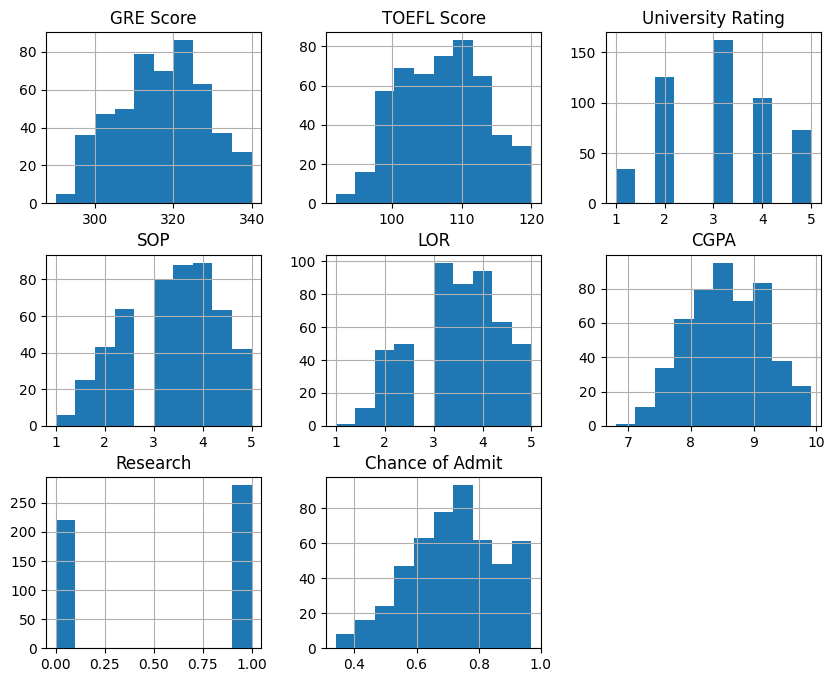

In [16]:
df.hist(figsize=(10,8))
plt.show()

GRE Score: The distribution is right-skewed with a peak around 320-330, indicating that most applicants have GRE scores in this range. Scores taper off below 300 and above 340, with fewer applicants at the extremes.
TOEFL Score: The distribution is also right-skewed, with a prominent peak around 110-115. Most scores cluster between 100 and 120, with a gradual decline toward lower and higher values, suggesting a concentration of applicants with moderate to high TOEFL scores.
University Rating: The distribution is heavily skewed toward lower ratings (1-2), with a sharp peak at rating 3. Higher ratings (4-5) have significantly fewer applicants, indicating that most apply to mid-tier or lower-rated universities.
SOP (Strength of Statement of Purpose): The distribution peaks around 3-4, showing that the majority of applicants have moderate to strong SOP ratings. There are fewer instances of very low (1) or very high (5) ratings, suggesting a relatively balanced but centered distribution.
LOR (Strength of Letter of Recommendation): Similar to SOP, the distribution peaks around 3-4, with a noticeable drop-off at the extremes (1 and 5). This indicates that most LOR ratings fall in the mid-range, with fewer exceptional or weak recommendations.
CGPA: The distribution is right-skewed with a peak around 8-9, reflecting that most applicants have CGPAs in the higher range. There are fewer instances below 7 and above 9.5, indicating a concentration of strong academic performers.
Research: The distribution is heavily skewed, with a vast majority of applicants having no research experience (0), and only a small fraction (around 1) having research experience. This suggests research is not common among the applicant pool.
Chance of Admit: The distribution is right-skewed with a peak around 0.6-0.8, indicating that most applicants have a moderate to high chance of admission. There are fewer instances below 0.4 and above 1.0, showing a concentration of probabilities in the upper-middle range.

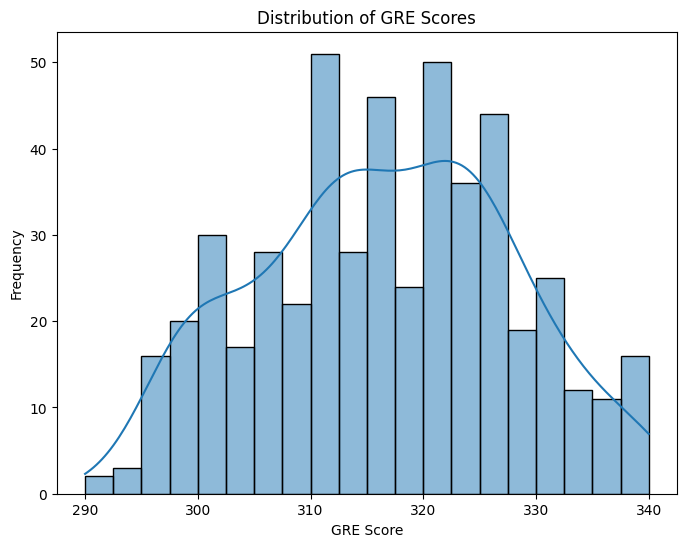

In [17]:
plt.figure(figsize=(8, 6))
sns.histplot(df['GRE Score'], bins=20, kde=True)
plt.title('Distribution of GRE Scores')
plt.xlabel('GRE Score')
plt.ylabel('Frequency')
plt.show()

The distribution shows a peak around 320-330, indicating that the majority of applicants have GRE scores in this range.
Scores taper off on both ends, with fewer applicants scoring below 300 or above 340, suggesting a relatively normal distribution with a slight right skew.

In [18]:
print(df['GRE Score'].describe())

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


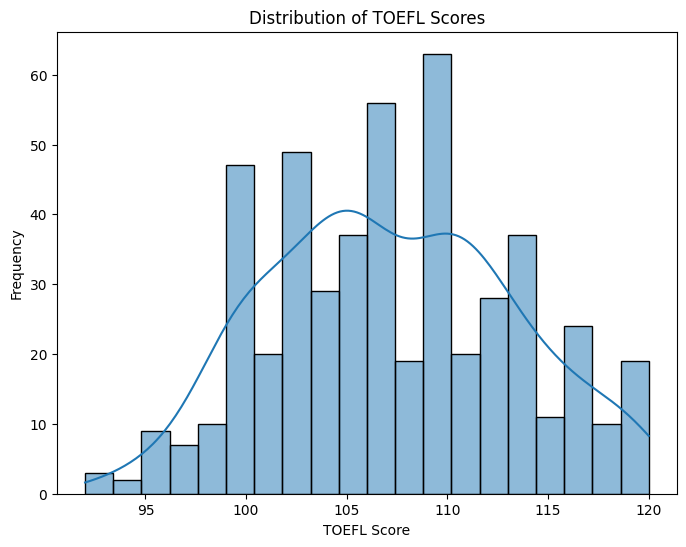

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


In [19]:
plt.figure(figsize=(8, 6))
sns.histplot(df['TOEFL Score'], bins=20, kde=True)
plt.title('Distribution of TOEFL Scores')
plt.xlabel('TOEFL Score')
plt.ylabel('Frequency')
plt.show()

print(df['TOEFL Score'].describe())

The distribution peaks around 110-115, showing that most applicants have TOEFL scores in this range.
Similar to GRE scores, the distribution is somewhat normal with a slight skew, with fewer scores below 100 and above 120.

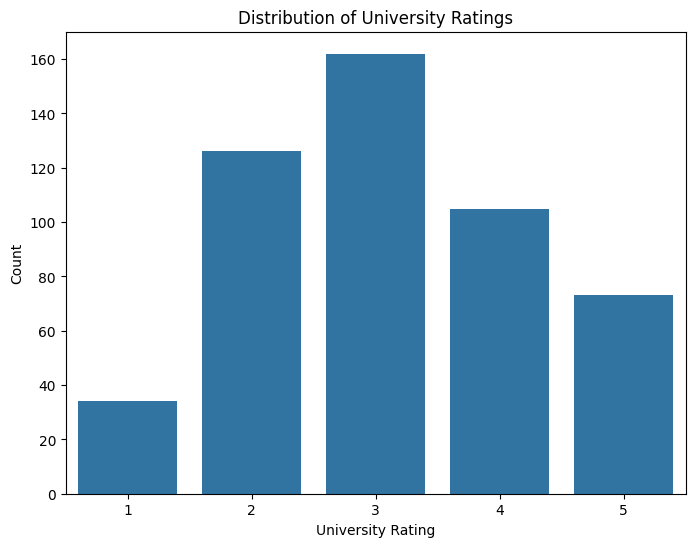

University Rating
3    162
2    126
4    105
5     73
1     34
Name: count, dtype: int64


In [20]:
plt.figure(figsize=(8, 6))
sns.countplot(x='University Rating', data=df)
plt.title('Distribution of University Ratings')
plt.xlabel('University Rating')
plt.ylabel('Count')
plt.show()

print(df['University Rating'].value_counts())

The data is heavily skewed towards a rating of 3, with the highest frequency of applicants applying to universities rated 3.
Ratings of 1 and 5 have the lowest frequencies, while ratings 2 and 4 fall in between, indicating a preference for mid-tier universities.

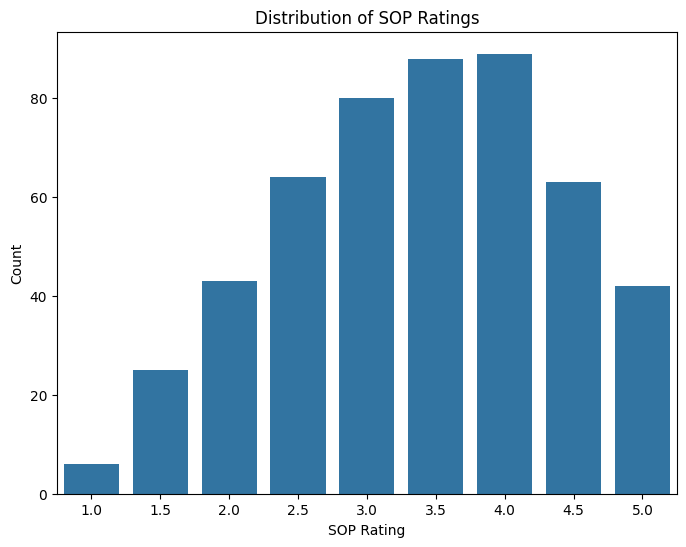

SOP
4.0    89
3.5    88
3.0    80
2.5    64
4.5    63
2.0    43
5.0    42
1.5    25
1.0     6
Name: count, dtype: int64


In [21]:
plt.figure(figsize=(8, 6))
sns.countplot(x='SOP', data=df)
plt.title('Distribution of SOP Ratings')
plt.xlabel('SOP Rating')
plt.ylabel('Count')
plt.show()

print(df['SOP'].value_counts())

The distribution peaks around 3.0-4.0, with the highest frequency at 4.0, suggesting that most applicants have strong SOP ratings.
Ratings below 2.0 and above 4.5 are less common, indicating a concentration of moderate to high SOP quality.

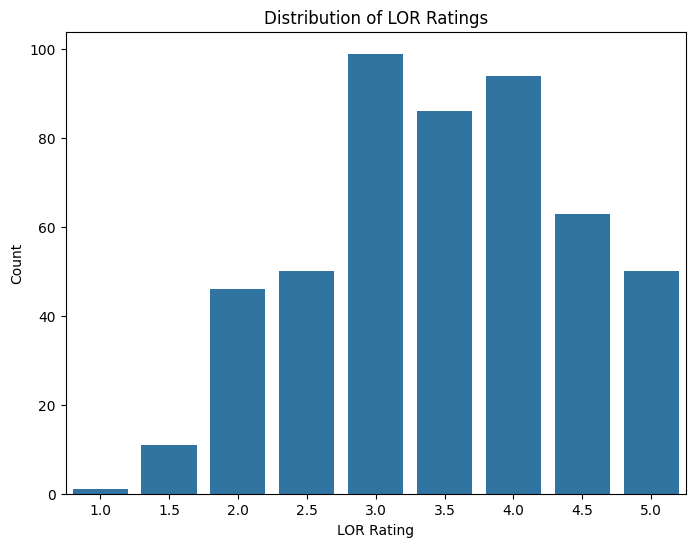

LOR
3.0    99
4.0    94
3.5    86
4.5    63
2.5    50
5.0    50
2.0    46
1.5    11
1.0     1
Name: count, dtype: int64


In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(x='LOR', data=df)
plt.title('Distribution of LOR Ratings')
plt.xlabel('LOR Rating')
plt.ylabel('Count')
plt.show()

print(df['LOR'].value_counts())

The distribution peaks around 3.0-4.0, with a notable frequency at 3.5, indicating a majority of applicants have good LOR ratings.
Ratings below 2.0 are rare, and the distribution shows a gradual decline towards 5.0, with a slight dip at 4.5.

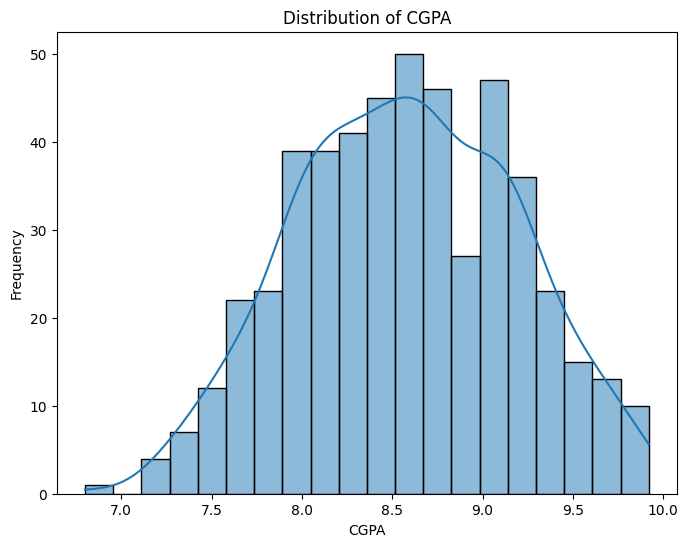

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


In [23]:
plt.figure(figsize=(8, 6))
sns.histplot(df['CGPA'], bins=20, kde=True)
plt.title('Distribution of CGPA')
plt.xlabel('CGPA')
plt.ylabel('Frequency')
plt.show()

print(df['CGPA'].describe())

The distribution is centered around 8.5-9.0, with a peak at 9.0, suggesting that most applicants have a CGPA in the high 8 to low 9 range.
The distribution is approximately normal, with fewer applicants having CGPAs below 7.5 or above 9.5.

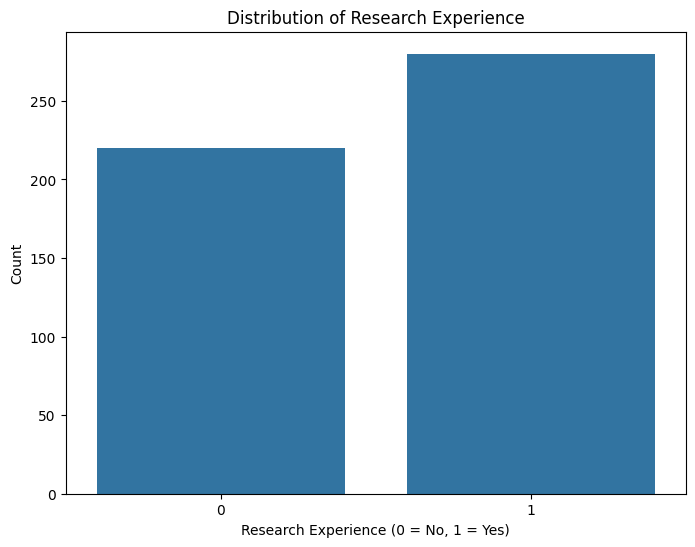

Research
1    0.56
0    0.44
Name: proportion, dtype: float64


In [24]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Research', data=df)
plt.title('Distribution of Research Experience')
plt.xlabel('Research Experience (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

print(df['Research'].value_counts(normalize=True))

The data is binary, with a significant majority of applicants (around 250) having research experience (1) compared to those without (around 200).
This indicates that research experience is common among the applicant pool.

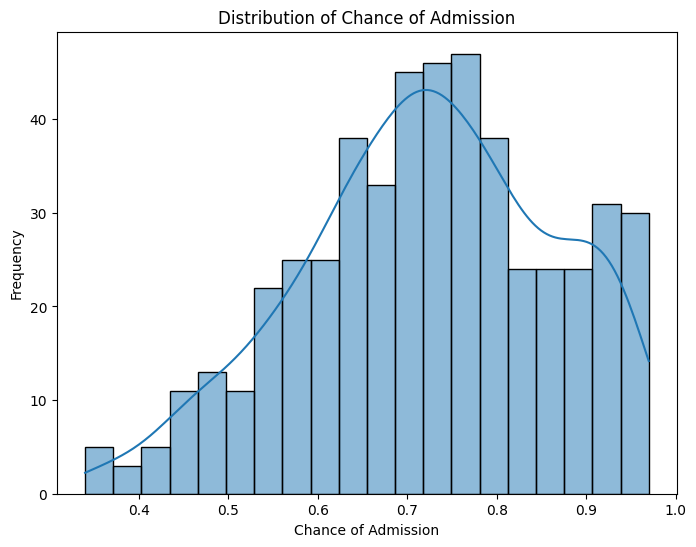

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit, dtype: float64


In [25]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Chance of Admit'], bins=20, kde=True)
plt.title('Distribution of Chance of Admission')
plt.xlabel('Chance of Admission')
plt.ylabel('Frequency')
plt.show()

print(df['Chance of Admit'].describe())

The distribution peaks around 0.7-0.8, indicating that most applicants have a moderate to high chance of admission.
The distribution is skewed towards higher chances, with fewer applicants having a chance below 0.5 or above 0.9.

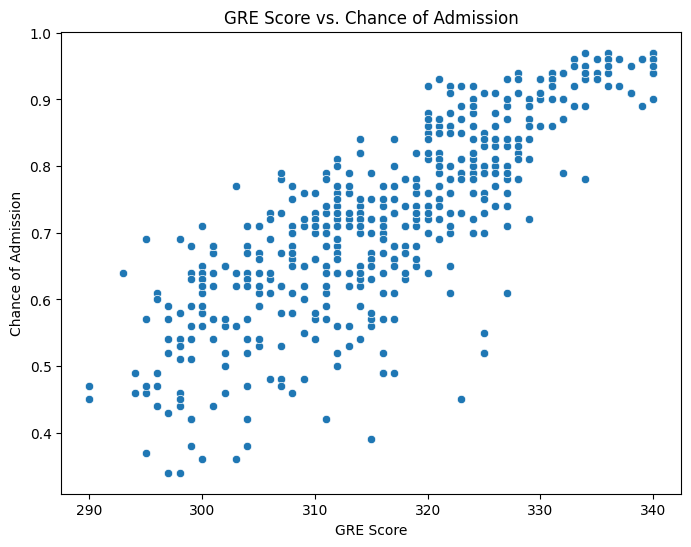

Correlation between GRE Score and Chance of Admission: 0.8103506354632605


In [26]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='GRE Score', y='Chance of Admit', data=df)
plt.title('GRE Score vs. Chance of Admission')
plt.xlabel('GRE Score')
plt.ylabel('Chance of Admission')
plt.show()

print("Correlation between GRE Score and Chance of Admission:", 
      df['GRE Score'].corr(df['Chance of Admit']))

There is a positive correlation between GRE scores and the chance of admission, with higher GRE scores generally associated with higher admission chances.
The scatter plot shows a trend where scores above 320 are more likely to result in admission chances above 0.7, though there is some variability.

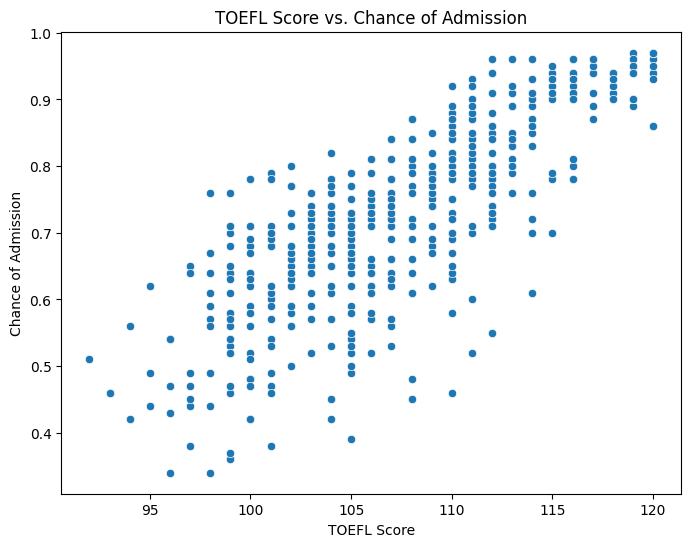

Correlation between TOEFL Score and Chance of Admission: 0.7922276143050835


In [27]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='TOEFL Score', y='Chance of Admit', data=df)
plt.title('TOEFL Score vs. Chance of Admission')
plt.xlabel('TOEFL Score')
plt.ylabel('Chance of Admission')
plt.show()

print("Correlation between TOEFL Score and Chance of Admission:", 
      df['TOEFL Score'].corr(df['Chance of Admit']))

There is a positive correlation between TOEFL scores and the chance of admission, with higher TOEFL scores (above 110) generally associated with admission chances above 0.7.
The scatter plot shows a dense cluster of points, indicating that most applicants with scores between 105 and 115 have a moderate to high chance of admission, with some variability.

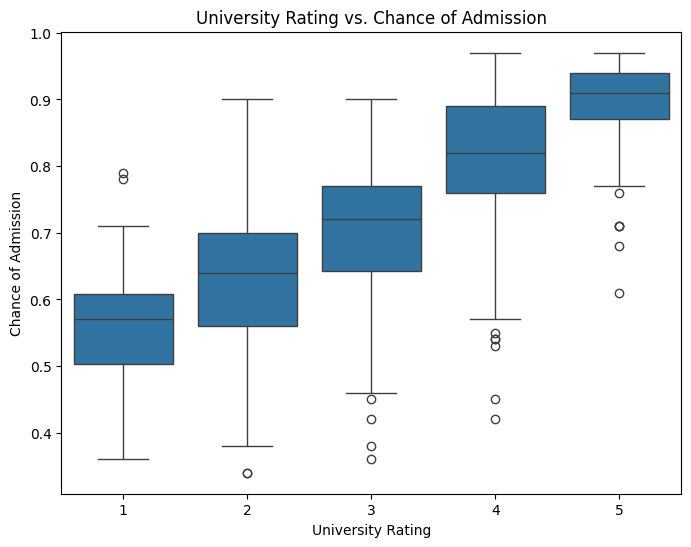

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='University Rating', y='Chance of Admit', data=df)
plt.title('University Rating vs. Chance of Admission')
plt.xlabel('University Rating')
plt.ylabel('Chance of Admission')
plt.show()

The box plot shows that the median chance of admission increases with university rating, with the highest median around 0.8-0.9 for rating 5.
Lower-rated universities (1 and 2) have a wider interquartile range and lower median chances (around 0.6-0.7), while higher-rated universities (4 and 5) show higher chances with some outliers.

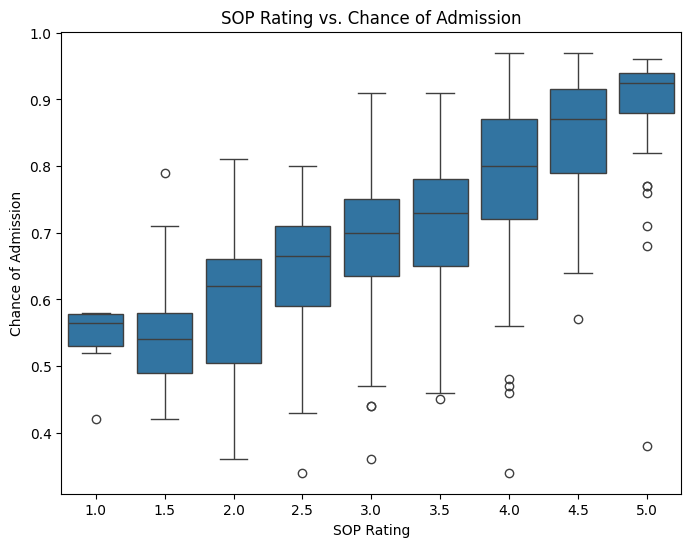

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='SOP', y='Chance of Admit', data=df)
plt.title('SOP Rating vs. Chance of Admission')
plt.xlabel('SOP Rating')
plt.ylabel('Chance of Admission')
plt.show()

The box plot indicates a general increase in the median chance of admission as SOP rating improves, with the highest median around 0.8-0.9 for ratings 4.0-5.0.
Lower SOP ratings (1.0-2.0) have lower median chances (around 0.6) and a wider spread, while higher ratings show a tighter range and higher chances.

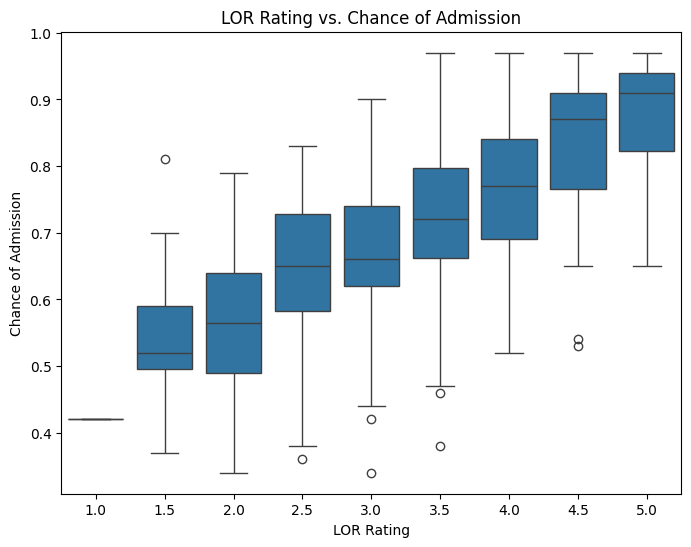

In [30]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='LOR', y='Chance of Admit', data=df)
plt.title('LOR Rating vs. Chance of Admission')
plt.xlabel('LOR Rating')
plt.ylabel('Chance of Admission')
plt.show()

The box plot suggests a positive trend, with the median chance of admission increasing from around 0.6 for ratings 1.0-2.0 to 0.8-0.9 for ratings 4.0-5.0.
Lower LOR ratings have more variability and outliers, while higher ratings (3.5-5.0) show a more consistent higher chance of admission.

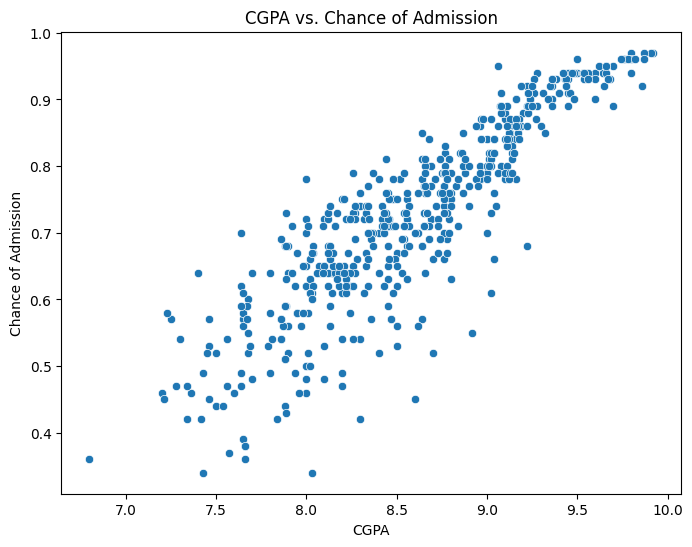

Correlation between CGPA and Chance of Admission: 0.8824125749045749


In [31]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CGPA', y='Chance of Admit', data=df)
plt.title('CGPA vs. Chance of Admission')
plt.xlabel('CGPA')
plt.ylabel('Chance of Admission')
plt.show()

print("Correlation between CGPA and Chance of Admission:", 
      df['CGPA'].corr(df['Chance of Admit']))

The scatter plot reveals a strong positive correlation, with higher CGPAs (above 8.5) associated with admission chances above 0.7.
The densest cluster of points is between 8.0 and 9.5 CGPA, with chances ranging from 0.6 to 0.9, indicating that CGPA is a significant predictor of admission likelihood.

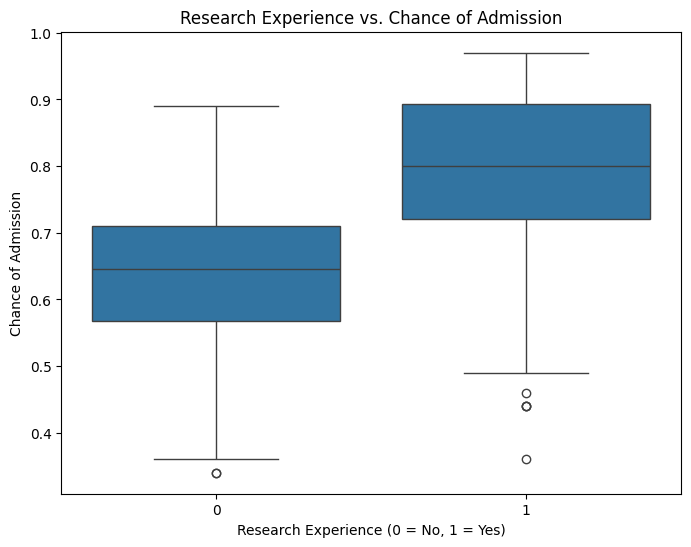

In [32]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Research', y='Chance of Admit', data=df)
plt.title('Research Experience vs. Chance of Admission')
plt.xlabel('Research Experience (0 = No, 1 = Yes)')
plt.ylabel('Chance of Admission')
plt.show()

The box plot shows that applicants with research experience (1) have a higher median chance of admission (around 0.8) compared to those without (0), where the median is around 0.7.
Both groups have a similar interquartile range, but the "with research" group has a slightly higher upper bound and fewer outliers below 0.5.

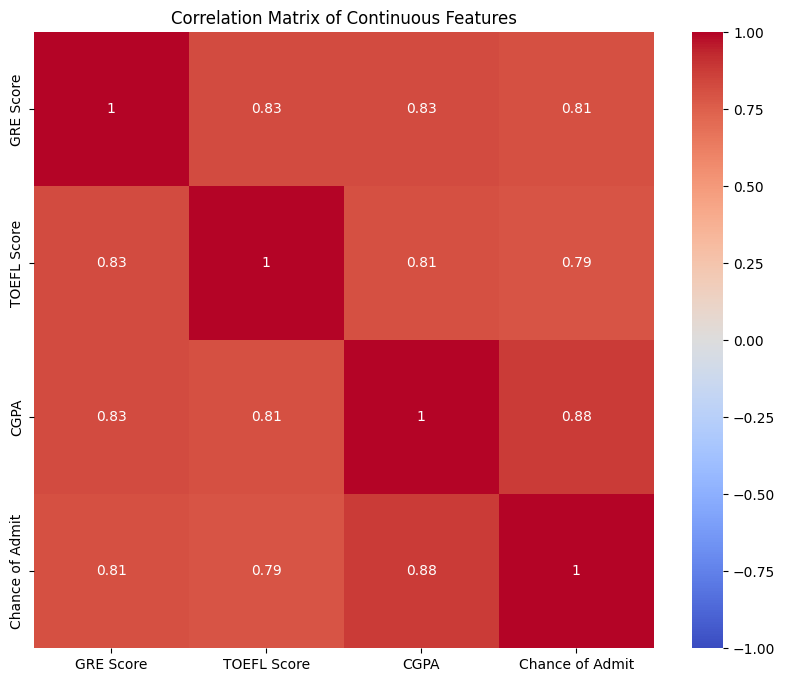

In [33]:
continuous_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
corr_matrix = df[continuous_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Continuous Features')
plt.show()

All continuous features (GRE Score, TOEFL Score, CGPA, Chance of Admit) show strong positive correlations with each other, ranging from 0.79 to 0.88.
The strongest correlation is between CGPA and Chance of Admit (0.88), followed by GRE Score and TOEFL Score (0.83), indicating that these factors are highly interrelated and influential on admission chances.

<Figure size 1200x1000 with 0 Axes>

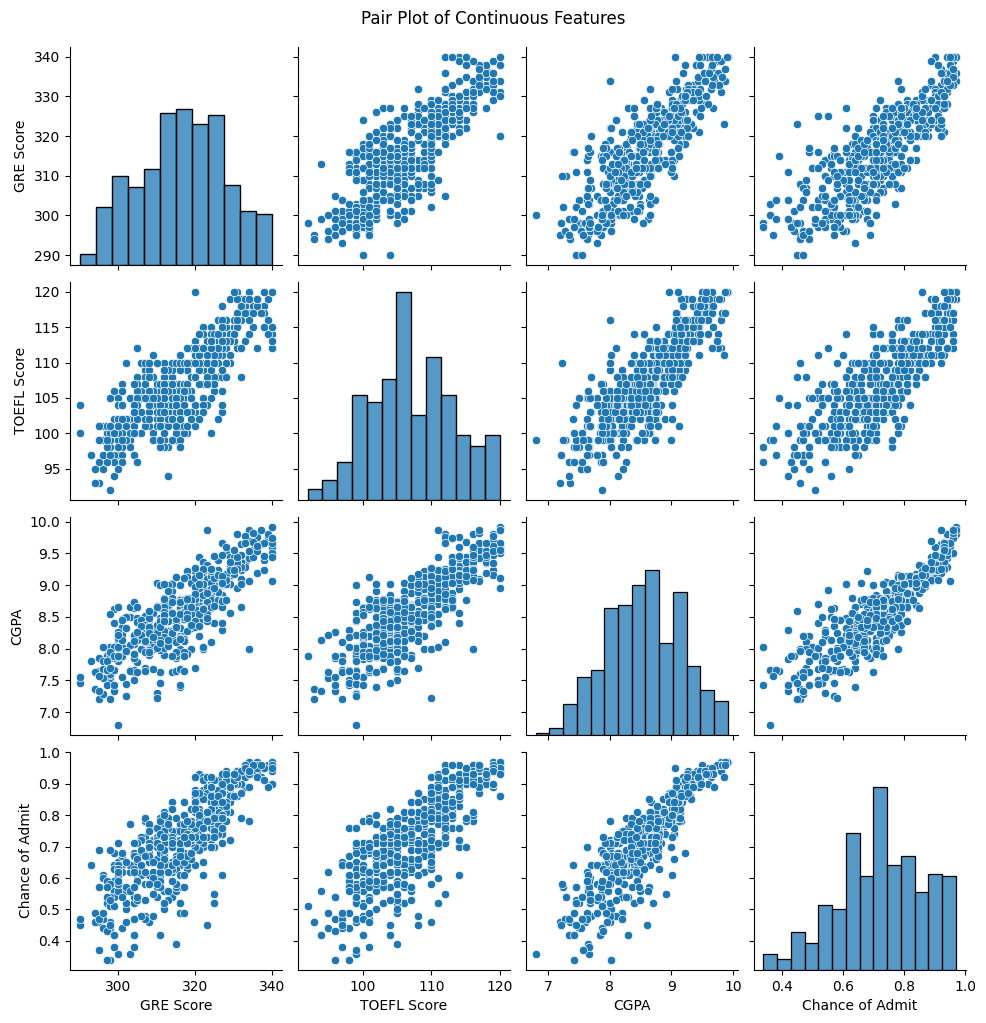

In [34]:
plt.figure(figsize=(12, 10))
sns.pairplot(df[continuous_cols])
plt.suptitle('Pair Plot of Continuous Features', y=1.02)
plt.show()

The pair plot confirms positive correlations across all pairs of continuous features (GRE Score, TOEFL Score, CGPA, Chance of Admit), with scatter plots showing upward trends.
Histograms on the diagonal reinforce the earlier observations of peaked distributions (e.g., GRE around 320-330, TOEFL around 110-115, CGPA around 8.5-9.0, Chance of Admit around 0.7-0.8).
The density of points in the scatter plots highlights that higher values of each feature tend to align with higher chances of admission.

# Implementation of Logistic Regression #

Converting the target variable using 0.7 threshold

In [35]:
df['Admitted'] = (df['Chance of Admit'] >= 0.7).astype(int)

In [37]:
X = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA', 'Research']]
y = df['Admitted']

In [38]:
model = LogisticRegression(max_iter=1000)

In [39]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [40]:
scores = cross_val_score(model, X, y, cv=cv, scoring='f1')

In [41]:
print('Cross-Validation F1 Scores:', scores)
print('Mean F1 Score:', scores.mean())
print('Standard Deviation of F1 Scores:', scores.std())

Cross-Validation F1 Scores: [0.88495575 0.82568807 0.87096774 0.88135593 0.95238095]
Mean F1 Score: 0.8830696904253422
Standard Deviation of F1 Scores: 0.040619336184908345
